# Section 3: Training a Supervised Learning Model
### Lecture 9: Improving the Logistic Regression Model through Hyperparameter Selection
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('../Modulo2/creditcard.csv.zip')

y = df['Class']
X = df.drop(['Class','Amount','Time'], axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [15]:
# random_state = 42 reproduce this experiment 
# stratify, imbalanced nature of our data, we're going to have very few positive instances of our target variable.
# preseved when you split into the training and test set, meaning that you will be guaranteed instances of fraud in both cases. 
# training and testing fraud =1

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced') # reduced overfitting, pesos das classes balanceados

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [17]:
model.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [18]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
print(set(y_pred)) # prever se é fraude 1 ou não 0

import numpy as np
np.unique(y_pred, return_counts=True)


{0, 1}


(array([0, 1]), array([27661,   820]))

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[27657,   775],
       [    4,    45]])

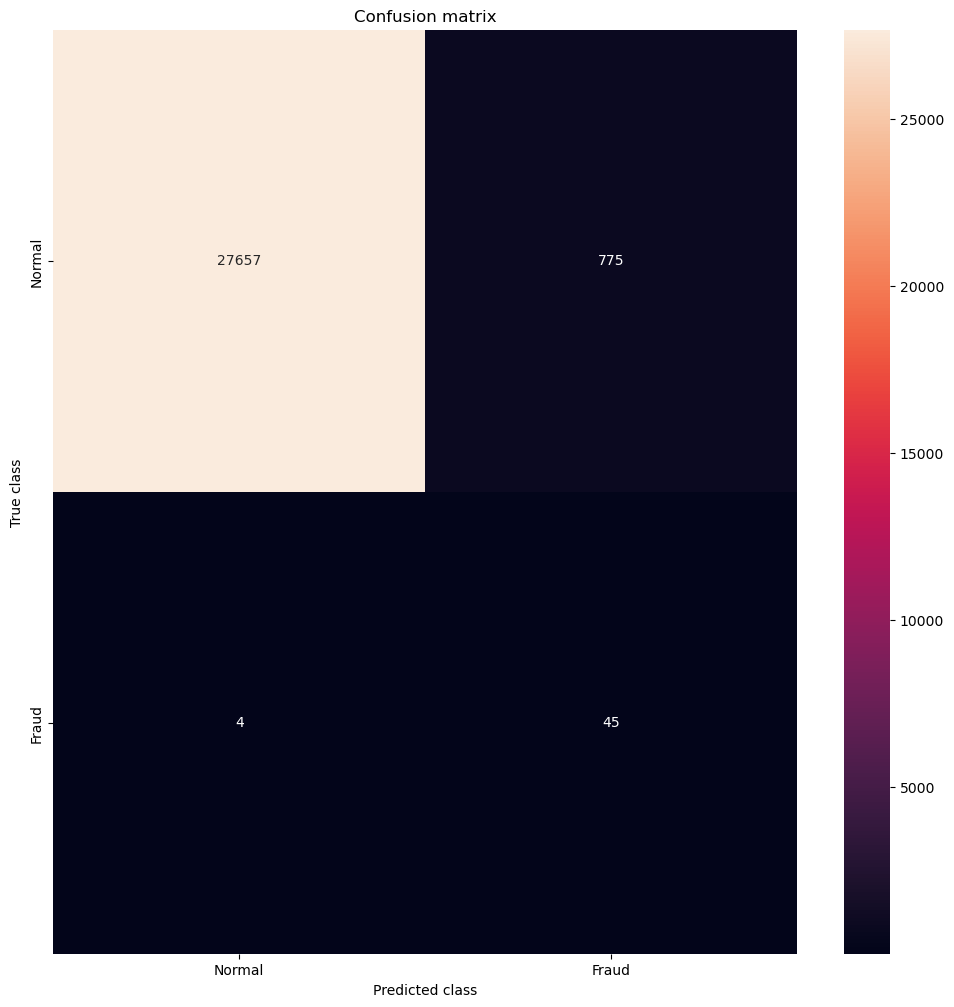

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

LABELS = ["Normal", "Fraud"]

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# second model

# granular attempt at rebalancing the class weights
## class_weight={0:1, 1:50}
less 100

O parâmetro class_weight={0: 1, 1: 50} é usado para resolver o problema de conjuntos de dados desbalanceados, como no exemplo atual de detecção de fraudes.

Diz ao modelo para dar mais importância a uma classe do que à outra durante o treinamento.

O que os números significam:

0: 1: A classe 0 (a classe majoritária, que aparece com mais frequência nos seus dados) recebe um peso de 1.

1: 50: A classe 1 (a classe minoritária, que aparece com pouca frequência) recebe um peso de 50.

O que o modelo faz com isso:

Ao atribuir um peso 50 vezes maior à classe minoritária, você está dizendo ao modelo que um erro na previsão da classe 1 é 50 vezes mais grave do que um erro na previsão da classe 0.

Sem esse ajuste, o modelo poderia simplesmente prever sempre a classe majoritária (0), pois assim ele minimizaria a maioria dos seus erros. Com o class_weight, ele é forçado a prestar mais atenção à classe minoritária para evitar penalidades severas, o que melhora sua capacidade de identificar os casos raros e importantes.

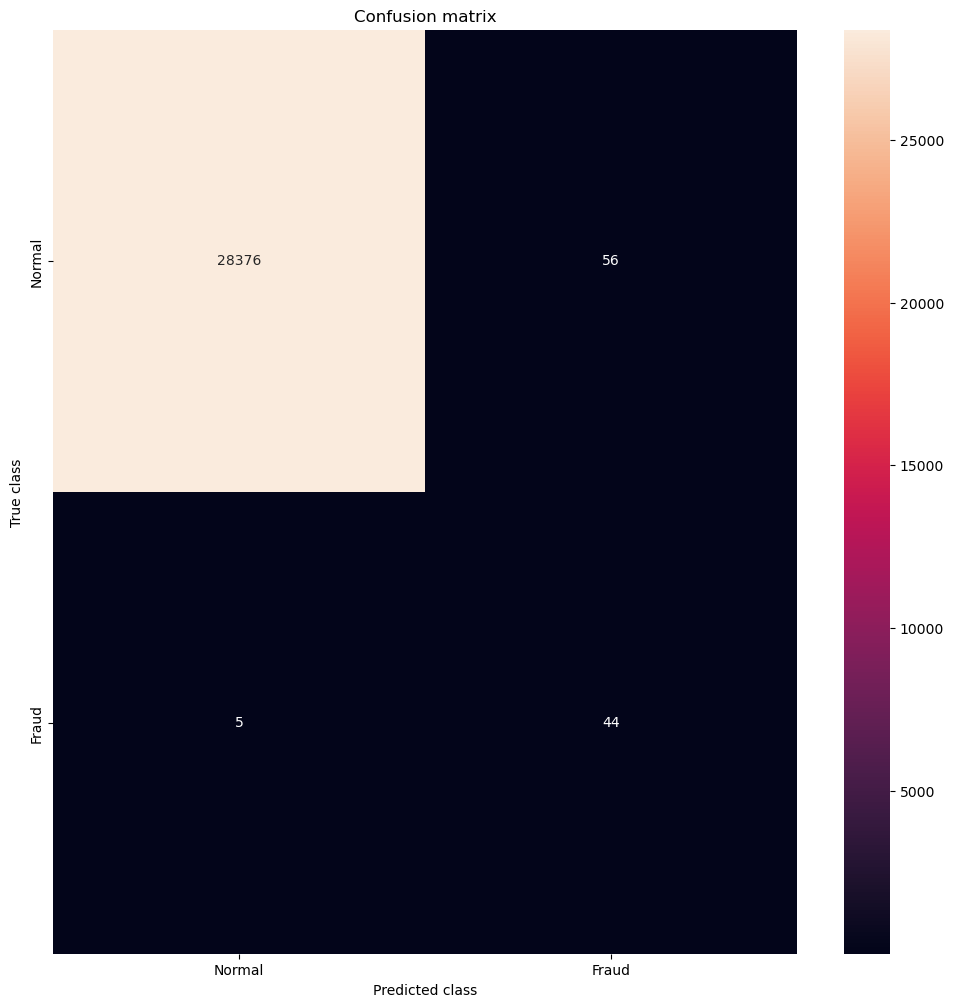

In [22]:
model = LogisticRegression(class_weight={0:1, 1:50})
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

LABELS = ["Normal", "Fraud"]
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()